# Zero-lift angle of attack of a cranked wing

Let us import the necessary libraries :


In [1]:
%run ./resources/init.py
%matplotlib inline

Let us consider a <i>cranked wing</i> with the following data : 

In [2]:
c_r = 1.44; c_k = c_r; c_t = 0.86; 
b_k = 6.36; b = 10.6;  b_k2=b-b_k;
Lambda_le_1 = 0*math.pi/180
Lambda_le_2 = 0*math.pi/180
eps_r = 0*math.pi/180
eps_k = eps_r
eps_t = (-3)*math.pi/180
alpha0l_r = (-2.5)*math.pi/180
alpha0l_k = alpha0l_r
alpha0l_t = (-1)*math.pi/180


In [3]:
Latex(
    r'\begin{array}{ll}'
    +  r'\text{root chord,}\, c_{\mathrm{r}} \,\text{or}\, c_{\mathrm{r,1}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{kink chord,}\, c_{\mathrm{k}}\,\text{or}\, c_{\mathrm{t,1}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}\,\text{or}\, c_{\mathrm{t,2}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0:.4}'.format(b_k/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, outer panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0:.4}'.format(b_k2/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
       + r'{0:.4}'.format(Lambda_le_1*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
       + r'{0:.4}'.format(Lambda_le_2*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{root section geometric twist,}\, \epsilon_{\mathrm{g,k}}: & ' 
       + r'{0:.4}'.format(eps_r*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{kink section geometric twist,}\, \epsilon_{\mathrm{g,k}}: & ' 
       + r'{0:.4}'.format(eps_k*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{tip section geometric twist,}\, \epsilon_{\mathrm{g,t}}: & ' 
       + r'{0:.4}'.format(eps_t*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{root profile zero-lift angle of attack,}\, \alpha_{0\ell,\mathrm{r}}: & ' 
       + r'{0:.4}'.format(alpha0l_r*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{kink profile zero-lift angle of attack,}\, \alpha_{0\ell,\mathrm{k}}: & ' 
       + r'{0:.4}'.format(alpha0l_k*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{tip profile zero-lift angle of attack,}\, \alpha_{0\ell,\mathrm{t}}: & ' 
       + r'{0:.4}'.format(alpha0l_t*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

Let us plot the planform of this wing.

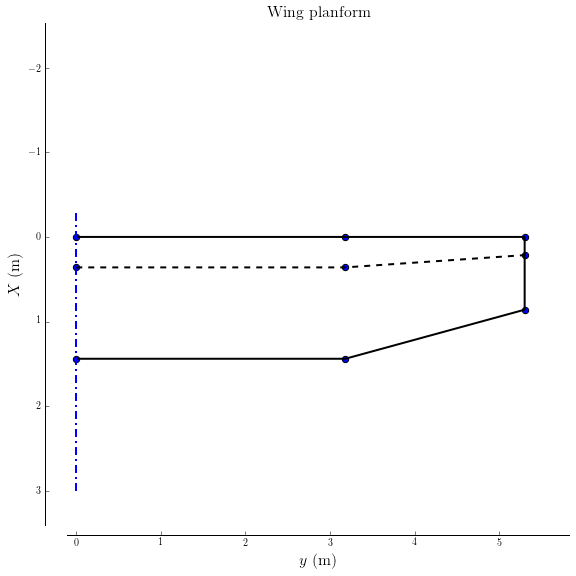

In [4]:
plot_planform_cw(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

To calculate the zero-lift angle of attack of this wing, we have to calculate $c(Y)$, $\alpha _{0l}(Y)$ , $\epsilon _g(Y)$ for the generic spanwise station $0\le Y \le \frac{b}{2} $ first.

### The law of the chords, $c(y)$

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us define function $c(y)$ calculating the above two coefficients:

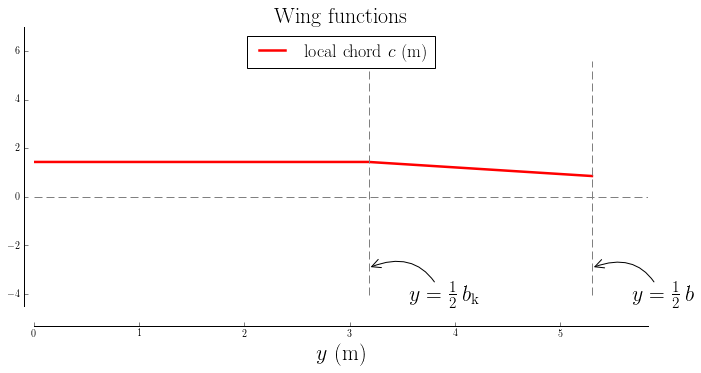

In [5]:
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 7, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord)

In [6]:
A_1 = 2*(c_k - c_r)/b_k; B_1 = c_r;
A_2 = (c_t - c_k)/(b/2 - b_k/2); B_2 = c_k;
display_workflowACBC_cw(c_r,c_k,c_t,A_1,B_1,A_2,B_2,b_k,b_k2)

<IPython.core.display.Latex object>

So we have:

In [7]:
display_workflowsystemc(A_1,B_1,A_2,B_2,b_k,b)

<IPython.core.display.Latex object>

### The laws of profile zero-lift angle of attack $\alpha_{0\ell}(y)$ and geometric twist $\epsilon_{\mathrm{g}}(y)$ 

The function $\alpha_{0\ell}(y)$ is the piecewise law that gives the zero-lift angle of attack of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\alpha_{0\ell}(y) = 
\begin{cases}
A_{\alpha,1} \, y + B_{\alpha,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\alpha,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\alpha} = 
\begin{cases}
A_{\alpha,1} = \dfrac{2}{b_{\mathrm{k}}}\, \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\alpha} = 
\begin{cases}
B_{\alpha,1} = \alpha_{0\ell,\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\alpha,2} = \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $\alpha_{0\ell}(y)$ calculating the above two coefficients:

In [8]:
A_0l_1 = 2*(alpha0l_k - alpha0l_r)/b_k; B_0l_1 = alpha0l_r;
A_0l_2 = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_0l_2 = alpha0l_k;
display_workflowAalpha_cw(alpha0l_t ,alpha0l_r ,alpha0l_r ,A_0l_1,B_0l_1,A_0l_2,B_0l_2,b_k,b_k2)

<IPython.core.display.Latex object>

So we have:

In [9]:
display_workflowsystemalpha(A_0l_1,B_0l_1,A_0l_2,B_0l_2,b_k,b)

<IPython.core.display.Latex object>

The function $\epsilon_{\mathrm{g}}(y)$ is the piecewise law that gives the geometric twist of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = 
\begin{cases}
A_{\epsilon,1} \, y + B_{\epsilon,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\epsilon,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\epsilon} = 
\begin{cases}
A_{\epsilon,1} = \dfrac{2}{b_{\mathrm{k}}}\, \epsilon_{\mathrm{g,k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\epsilon} = 
\begin{cases}
B_{\epsilon,1} = 0 \, \mathrm{rad}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\epsilon,2} = \epsilon_{\mathrm{g,k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [10]:
A_eps1=eps_k*math.pi/180*2/b_k
B_eps1=eps_r
A_eps2=2*(eps_t-eps_k)/(b_k2)
B_eps2=eps_k
display_workflowAepsilon_cw(eps_t,eps_k,eps_r,A_eps1,B_eps1,A_eps2,B_eps2,b_k,b_k2)

<IPython.core.display.Latex object>

In [11]:
display_workflowsystemalpha(A_eps1,B_eps1,A_eps2,B_eps2,b_k,b)

<IPython.core.display.Latex object>

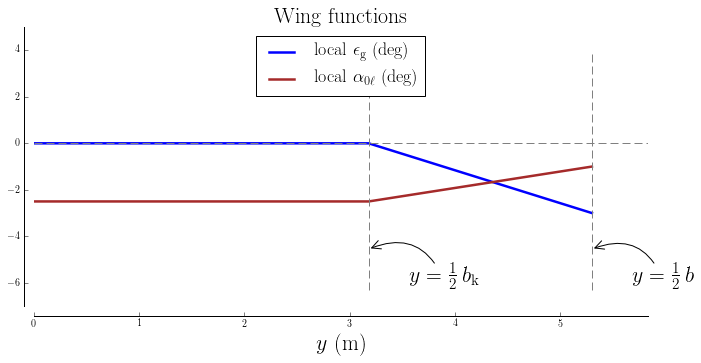

In [12]:
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 5, ymin = -7,
                    figsize = (11,5), vshift_xaxis=10,                    
                    f_twist = f_twist,
                    f_alpha0l = f_alpha0l)

### Reference surface $S$ and taper ratio $\lambda$

Let us calculate the last necessary data.

The inner taper ratio is defined by :

\begin{equation}
\lambda_1 = \frac{ c_{\mathrm{k}} }{ c_{\mathrm{r}} }
\end{equation}

In [13]:
taper_1=c_k/c_r
display(Math(r'\lambda_{1} =\,' + '{0:.3}'.format(taper_1)))

<IPython.core.display.Math object>

The outer taper ratio is :

\begin{equation}
\lambda_2 = \frac{ c_{\mathrm{k}} }{ c_{\mathrm{r}} }
\end{equation}

In [14]:
taper_2=c_t/c_k
display(Math(r'\lambda_{2} =\,' + '{0:.3}'.format(taper_2)))

<IPython.core.display.Math object>

The inner panel reference surface is given by : 

In [15]:
S_i= (b_k)/2 * c_r * (1 + taper_1)
Latex(
    r'\begin{align*}'
     + r'S_{1}=\frac{b_1}{2}c_{r,1} (1+\lambda_1)='
     + r'{0:.3}'  .format(S_i)
     + r'\text{m} ^2'
    +r'\end{align*}'
)

<IPython.core.display.Latex object>

while the outer one:

In [16]:
S_o= (b_k2)/2 * c_k * (1 + taper_2)
Latex(
    r'\begin{align*}'
    +r'S_{2}=\frac{b_2}{2}c_{r,2} (1+\lambda_1)='
    +r'{0:.3}'  .format(S_o)
    +r'\text{m} ^2'
    +r'\end{align*}'
)


<IPython.core.display.Latex object>

And so the total reference surface : 

In [17]:
S=S_i+S_o
Latex( r'\begin{align*}'
        + r'S &' + r'='+r'S_1\,+\,S_2' + r'\,=\,'
        + r'{0:.4}'.format(S_i) + r'\,\text{m}^2' +r'\,+\,'  + r'{0:.4}'.format(S_o) + r'\,\text{m}^2' + r'\,=\,'
        + r'{0:.4}'.format(S) + r'\,\text{m}^2'
      + r'\end{align*}'
)

<IPython.core.display.Latex object>

At this point we can now finally calculate the zero-lift angle of the finite wing. 

## The wing zero-lift angle of attack $\alpha_{0L,\mathrm{W}}$

The zero-lift angle of attack is given by the following formula:

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b/2} 
    \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

where the functions $c(y)$, $\alpha_{0\ell}(y)$, and $\epsilon_{\mathrm{g}}(y)$ are the piecewise linear functions defined above.

For a two-panel cranked wing the formula becomes : 

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b_1/2} 
    \big[\alpha_{0\ell,1}(y) - \epsilon_{\mathrm{g,1}}(y)\big]
    c(y) \, \mathrm{d}y + \frac{2}{S} \int_{b_1/2}^{b_2/2} 
    \big[\alpha_{0\ell,2}(y) - \epsilon_{\mathrm{g,2}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

By extending the previous formula we have :

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b_1/2} 
    \big[(A_{\alpha,1}Y + B_{\alpha,1}) - A_{\epsilon,1}Y\big](A_{c,1}Y + B_{c,1})
     \mathrm{d}y + \\ \frac{2}{S} \int_{b_1/2}^{b_2/2} 
    \big[A_{\alpha,2}(Y - \frac{b_1}{2}) + B_{\alpha,2} - A_{\epsilon,2}(Y - \frac{b_1}{2}) - B_{\epsilon,2}\big]\\ \cdot\big[A_{c,2}(Y - \frac{b_1}{2})+ B_{c,2}\big]
     \mathrm{d}y
\end{equation}

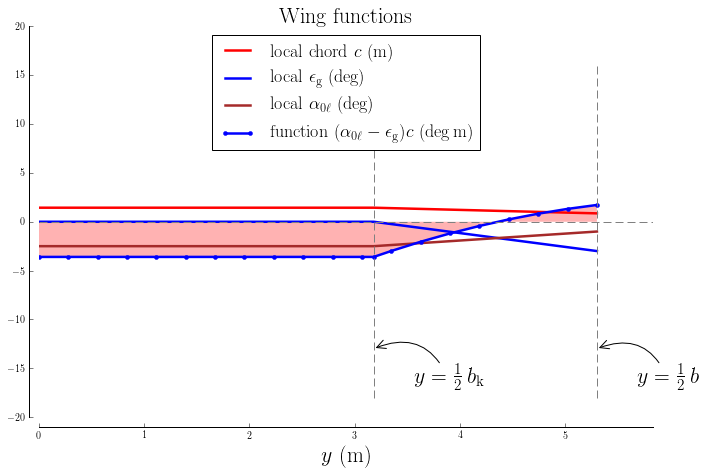

In [18]:
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 20, ymin = -20,
                    figsize = (11,7), vshift_xaxis=10,                    
                    f_chord = f_chord,
                    f_twist = f_twist,
                    f_alpha0l = f_alpha0l,
                    f_alpha0L_integral = f_alpha0l_epsg_c)

Let us calculate the just defined integral for both the inner and the outher panel :

In [19]:
alpha0L_1=integrate_alfa_0l(A_0l_1,B_0l_1,A_eps1,A_1,B_1,b_k,S)[0]
display(Math(r'\alpha_\mathrm{0L,w,1} = '+ '{0:.4}'.format(alpha0L_1) +'\,\mathrm{rad} \, = ' + '{0:.4}'.format(alpha0L_1*180/math.pi)+'\,\mathrm{deg}'))

<IPython.core.display.Math object>

In [20]:
alpha0L_2=integrate_alfa_0l_cw_outer(A_0l_2,B_0l_2,A_eps2,B_eps2,A_2,B_2,b_k,b,S)[0]
display(Math(r'\alpha_\mathrm{0L,w,2} = '+ '{0:.4}'.format(alpha0L_2) +'\,\mathrm{rad} \, = ' + '{0:.4}'.format(alpha0L_2*180/math.pi)+'\,\mathrm{deg}'))

<IPython.core.display.Math object>

In [21]:
alpha0L=alpha0L_1+alpha0L_2
Latex(
    r'\begin{align*}'
    +r'\alpha_{0,L}=\alpha_{0L,1}+\alpha_{0L,2}='
    +r'{0:.3}'  .format(alpha0L*180/math.pi)
    +r'\text{°} '
    +r'\end{align*}'
)

<IPython.core.display.Latex object>

Here there is the full workflow :

In [22]:
alpha0L_law_integral_indefinite_1=integrate_alfa_0l(A_0l_1,B_0l_1,A_eps1,A_1,B_1,b_k,S)[1]
alpha0L_law_integral_indefinite_2=integrate_alfa_0l_cw_outer(A_0l_1,B_0l_1,A_eps1,B_eps2,A_1,B_1,b_k,b,S)[1]
display_workflow_alpha0L_cw(b, b_k, S, A_1, B_1, A_0l_1, B_0l_1, A_eps1,B_eps2,
                             A_2, B_2, A_0l_2, B_0l_2, A_eps2, B_eps2,
                             alpha0L_law_integral_indefinite_1,alpha0L_law_integral_indefinite_2,
                             alpha0L_1,alpha0L_2,alpha0L)

<IPython.core.display.Latex object>